# Testing N vs. area in TRILEGAL

In [1]:
import pandas as pd
import numpy as np

import sys
import os
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code/vespa_update')
from vespa_update import trilegal as trilegal_update
from TRILEGAL import TRILEGAL
from OpSim import OpSim

print(os.environ['PATH'])

/Users/ageller/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2336: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


/Volumes/highnoon2go/highnoon/WORK/LSST/onGitHub/EBLSST/testing/TRILEGAL/vespa_update:/Users/ageller/anaconda3/bin:/Users/ageller/anaconda3/condabin:/Users/ageller/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/share/dotnet:/opt/X11/bin:~/.dotnet/tools:/Library/Frameworks/Mono.framework/Versions/Current/Commands


In [2]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/baseline2018a.db'
OpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


In [3]:
i = 0
galaxy = TRILEGAL()
galaxy.RA = OpS.RA[i]
galaxy.Dec = OpS.Dec[i]
galaxy.fieldID = OpS.fieldID[i]
galaxy.tmpdir = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/testing/TRILEGAL/grid/'

for a in range(11):
    if (a > 0):
        galaxy.tmpfname = 'TRILEGAL_model_fID_'+str(int(OpS.fieldID[i]))+'_area'+str(int(a))+'.h5'
        galaxy.area = a
        print('area = ', a)
        galaxy.downloadModel()

area =  1
downloading model TRILEGAL_model_fID_1_area1.h5 1.0


/Users/ageller/WORK/LSST/onGitHub/EBLSST/code/vespa_update/trilegal.py:101: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pd.read_table(outfile, sep='\s+', skipfooter=1, engine='python')


area =  2
downloading model TRILEGAL_model_fID_1_area2.h5 2.0
area =  3
downloading model TRILEGAL_model_fID_1_area3.h5 3.0
area =  4
downloading model TRILEGAL_model_fID_1_area4.h5 4.0
area =  5
downloading model TRILEGAL_model_fID_1_area5.h5 5.0
area =  6
downloading model TRILEGAL_model_fID_1_area6.h5 6.0
area =  7
downloading model TRILEGAL_model_fID_1_area7.h5 7.0
area =  8
downloading model TRILEGAL_model_fID_1_area8.h5 8.0
area =  9
downloading model TRILEGAL_model_fID_1_area9.h5 9.0
area =  10
downloading model TRILEGAL_model_fID_1_area10.h5 10.0


In [6]:
froot = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/testing/TRILEGAL/grid/'
area = []
N = []
for a in range(11):
    if (a > 0):
        f = froot+'TRILEGAL_model_fID_1_area'+str(int(a))+'.h5'
        df = pd.read_hdf(f)
        N.append(float(len(df.index)))
        with pd.HDFStore(f) as store:
            attrs = store.get_storer('df').attrs
            area.append(float(attrs.trilegal_args['area']))
N = np.array(N)
area = np.array(area)

In [7]:
import matplotlib.pyplot as plt

[   0.  486. -325.  634.  318.  330. -333.   96. -160.  -57.]
[ 45970.  92426. 137585. 184514. 230168. 276150. 321457. 367856. 413570.
 459643.]
[ 0.          0.52582607 -0.23621761  0.34360536  0.13815995  0.11950027
 -0.10359084  0.02609717 -0.03868753 -0.01240093]


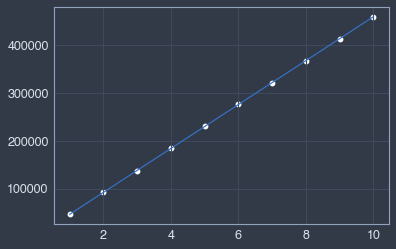

In [17]:
f,ax = plt.subplots()
ax.scatter(area,N, c='white')

N0 = N[0]
a0 = area[0]
Nratio = N0*area/a0
          
ax.plot(area,Nratio)
print(N - Nratio)
print(N)
print((N - Nratio)/N*100.)